In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np
import pandas as pd

In [3]:
DataHouseVotes = pd.read_csv('house-votes-84.csv')

In [10]:
df=DataHouseVotes
df.replace('n',0, inplace=True)
df.replace('y',1, inplace=True)
df.replace('w', -1,inplace=True)
df.replace('democrat', 1,inplace=True)
df.replace('republican', 0,inplace=True)
x = df.iloc[:, range(1,17)]
y = df.iloc[:,0]
kf = KFold(n_splits=5, random_state=233, shuffle=True)

In [11]:
LogRegModel=LogisticRegression()
kf = KFold(n_splits=5, random_state=233, shuffle=True)
accuracy=0
i=0
for train_index, test_index in kf.split(x):
    i+=1
    train=train_index.tolist()
    test=test_index.tolist()
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train_index], y[test_index]
    fitted_model=LogRegModel.fit(x_train, y_train)
    y_pred=LogRegModel.predict(x_test)

In [12]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [13]:
#fitting
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#predict
y_pred = classifier.predict(x_test)
print ("Create a classification model of your choice (naive Bayes, logistic regression, Bayesian network, neural networks, etc.)")

Create a classification model of your choice (naive Bayes, logistic regression, Bayesian network, neural networks, etc.)


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("2) Find overall classification accuracy")
print("the accuracy is :",metrics.accuracy_score(y_test, y_pred))


[[34  1]
 [ 2 50]]
2) Find overall classification accuracy
the accuracy is : 0.9655172413793104


In [16]:
#from confusion matrix 
print("3) Report sensitivity and specificity for each of the two parties")
sensitivity_dem= cm[0,0]/(cm[0,0]+cm[0,1])
specificity_dem= cm[1,1]/(cm[1,0]+cm[1,1])
print ('sensitivity of democrat is:',(sensitivity_dem))
print ('specificity of democrat is:',(specificity_dem))


3) Report sensitivity and specificity for each of the two parties
sensitivity of democrat is: 0.9714285714285714
specificity of democrat is: 0.9615384615384616


In [17]:
sensitivity_rep= cm[1,1]/(cm[1,0]+cm[1,1])
specificity_rep= cm[0,0]/(cm[0,0]+cm[0,1])
print ('sensitivity of republican is:',(sensitivity_rep))
print ('specificity of republican is:',(specificity_rep))

sensitivity of republican is: 0.9615384615384616
specificity of republican is: 0.9714285714285714


In [122]:
#Measure positive and negative predictive value for each of the two parties
print("4) Measure positive and negative predictive value for each of the two parties")
dem_PPV= cm[0,0]/(cm[0,0]+cm[1,0])
dem_NPV= cm[1,1]/(cm[1,1]+cm[0,1])
print ("democrat positive predictive value(PPV) = TP/(TP+FP) =",dem_PPV)
print ("democrat negative predictive value(NPV) = TN/(TN+FN) =",dem_NPV)


4) Measure positive and negative predictive value for each of the two parties
democrat positive predictive value(PPV) = TP/(TP+FP) = 0.9444444444444444
democrat negative predictive value(NPV) = TN/(TN+FN) = 0.9803921568627451


In [123]:
rep_PPV= cm[1,1]/(cm[1,1]+cm[0,1])
rep_NPV= cm[0,0]/(cm[0,0]+cm[1,0])
print ("republican positive predictive value(PPV) = TP/(TP+FP) =",rep_PPV)
print ("republican negative predictive value(NPV) = TN/(TN+FN) =",rep_NPV)

republican positive predictive value(PPV) = TP/(TP+FP) = 0.9803921568627451
republican negative predictive value(NPV) = TN/(TN+FN) = 0.9444444444444444


5) Plot ROC curve of your model


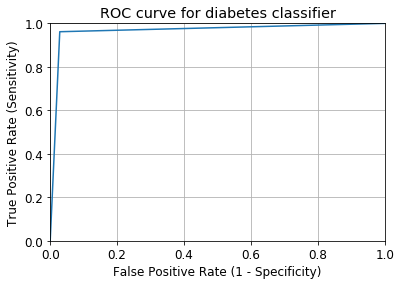

In [126]:
print("5) Plot ROC curve of your model")
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)